# PLOT GENERATION
The main purpose here is to
1. Run the final reconstructions for bart (with optimized hyperparameter value)
2. plot the reconstructions results in a paper suitable format

In [2]:
from helpers import *

# Here we run the final reconstructions for BART

In [24]:
import subprocess

# phantom l1, l2, eye l1,l2, cardiac l1,l2 
bestregsbart = [0.020433597178569417,0.11264816923358861,0.00043444122987293686,0.16754749189233412,0.0008199608244604942,0.3343011965403282]
prefixes = ['phantom','eye','cardiac']
regtypes = ['l1','l2']
groundtruths = [cfl.readcfl(f'./bart_data/image_bart_{prefix}') for prefix in prefixes]
# RUN BART RECONS USING BEST REGVALS
cnt = 0
iterations = 160

for index, prefix in enumerate(prefixes):
    for regtype in regtypes:
        regul_param = bestregsbart[cnt]
        print(f"regularization parameter = {regul_param}")
        groundtruth = groundtruths[index]

        # Define ROI parameters based on image type
        if prefix == 'phantom':
            ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
        elif prefix == 'eye':
            ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
        elif prefix == 'cardiac':
            ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
        else:
            raise ValueError(f"Invalid prefix provided: {prefix}")

        # Construct BART command for L1 or L2 regularization
        output_path = f'./reconstructions/bart/{prefix}_{regtype}'
        if regtype == 'l2':
            bart_command = (
                f"./bart/bart pics -r{regul_param} -l2 -i{iterations} -t ./bart_data/traj_bart_{prefix} -p ./bart_data/weights_bart_{prefix}_scaled ./bart_data/kspace_bart_{prefix} ./bart_data/C_bart_{prefix} {output_path}"
            )
        elif regtype == 'l1':
            bart_command = (
                f"./bart/bart pics -R T:3:0:{regul_param} -i{iterations} -m -u {10*regul_param} -C4 -t ./bart_data/traj_bart_{prefix} -p ./bart_data/weights_bart_{prefix}_scaled ./bart_data/kspace_bart_{prefix} ./bart_data/C_bart_{prefix} {output_path}"
            )
        # Execute BART command
        try:
            subprocess.run(bart_command, shell=True, check=True)
        except subprocess.CalledProcessError as e:
            print(f"Error running BART command for {prefix} with {regtype}: {e}")
            continue  # Skip to the next iteration if BART fails

        # Read the reconstructed image
        reconstructed = cfl.readcfl(output_path)

        # Normalize the reconstruction within the specified ROI
        reconstructed = normalize_within_roi(reconstructed, groundtruth, ellipse_params)

        # Save the rescaled reconstruction in BART format
        cfl.writecfl(output_path, reconstructed)
        cnt += 1
print("BART reconstructions completed and saved successfully.")


regularization parameter = 0.020433597178569417
[  1 256  30   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
TV regularization: 0.020434
Regularization terms: 1, Supporting variables: 0
ADMM
Total Time: 8.118914
regularization parameter = 0.11264816923358861
[  1 256  30   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
l2 regularization: 0.112648
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 5.890298
regularization parameter = 0.00043444122987293686
[  1 256  30  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
TV regularization: 0.000434
Regularization terms: 1, Supporting variables: 0
ADMM
Total Time: 38.922575
regularization parameter = 0.16754749189233412
[  1 256  30  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1  

# SAME BUT WITH  250 ITERATIONS

In [25]:
import subprocess

# phantom l1, l2, eye l1,l2, cardiac l1,l2 
bestregsbart = [0.020433597178569417,0.11264816923358861,0.00043444122987293686,0.16754749189233412,0.0008199608244604942,0.3343011965403282]
prefixes = ['phantom','eye','cardiac']
regtypes = ['l1','l2']
groundtruths = [cfl.readcfl(f'./bart_data/image_bart_{prefix}') for prefix in prefixes]
# RUN BART RECONS USING BEST REGVALS
cnt = 0
iterations = 250

for index, prefix in enumerate(prefixes):
    for regtype in regtypes:
        regul_param = bestregsbart[cnt]
        print(f"regularization parameter = {regul_param}")
        groundtruth = groundtruths[index]

        # Define ROI parameters based on image type
        if prefix == 'phantom':
            ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
        elif prefix == 'eye':
            ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
        elif prefix == 'cardiac':
            ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
        else:
            raise ValueError(f"Invalid prefix provided: {prefix}")

        # Construct BART command for L1 or L2 regularization
        output_path = f'./reconstructions/bart/{prefix}_{regtype}_{iterations}_iterations'
        if regtype == 'l2':
            bart_command = (
                f"./bart/bart pics -r{regul_param} -l2 -i{iterations} -t ./bart_data/traj_bart_{prefix} -p ./bart_data/weights_bart_{prefix}_scaled ./bart_data/kspace_bart_{prefix} ./bart_data/C_bart_{prefix} {output_path}"
            )
        elif regtype == 'l1':
            bart_command = (
                f"./bart/bart pics -R T:3:0:{regul_param} -i{iterations} -m -u {10*regul_param} -C4 -t ./bart_data/traj_bart_{prefix} -p ./bart_data/weights_bart_{prefix}_scaled ./bart_data/kspace_bart_{prefix} ./bart_data/C_bart_{prefix} {output_path}"
            )

        # Execute BART command
        try:
            subprocess.run(bart_command, shell=True, check=True)
        except subprocess.CalledProcessError as e:
            print(f"Error running BART command for {prefix} with {regtype}: {e}")
            continue  # Skip to the next iteration if BART fails

        # Read the reconstructed image
        reconstructed = cfl.readcfl(output_path)

        # Normalize the reconstruction within the specified ROI
        reconstructed = normalize_within_roi(reconstructed, groundtruth, ellipse_params)

        # Save the rescaled reconstruction in BART format
        cfl.writecfl(output_path, reconstructed)
        cnt += 1
print("BART reconstructions completed and saved successfully.")


regularization parameter = 0.020433597178569417
[  1 256  30   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
TV regularization: 0.020434
Regularization terms: 1, Supporting variables: 0
ADMM
Total Time: 12.484677
regularization parameter = 0.11264816923358861
[  1 256  30   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
l2 regularization: 0.112648
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 9.181903
regularization parameter = 0.00043444122987293686
[  1 256  30  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
TV regularization: 0.000434
Regularization terms: 1, Supporting variables: 0
ADMM
Total Time: 64.358105
regularization parameter = 0.16754749189233412
[  1 256  30  42   1   1   1   1   1   1   1   1   1   1   1   1 ]
[256 256   1 

In [26]:
reconstructed = cfl.readcfl('/Users/mauroleidi/Desktop/comparisonMonalisaBartNew/comparisonMonalisaBart/reconstructions/bart/phantom_l1')

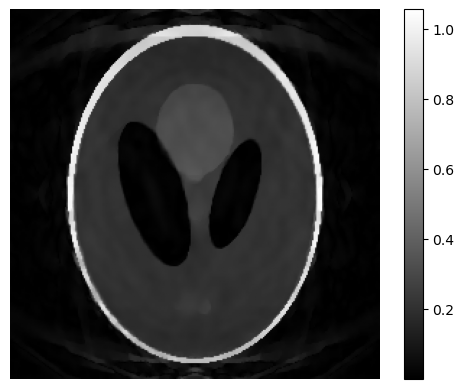

In [27]:

#plot_histogram(reconstructed,title="Histogram low reg val")
plt.imshow(abs(reconstructed), cmap="gray")  # Use grayscale colormap
plt.colorbar()  # Optional: Show color scale
plt.axis("off")  # Hide axes
plt.show()

In [28]:
# EXAMPLE OF HOW TO LOAD IMAGES FROM MEMORY

# Filepath settings
prefixes = ['phantom','eye','cardiac']
rootfilepath = './reconstructions/'

# Load Images
groundtruths = [abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}')) for prefix in prefixes]
# Load and normalize gridded recons on the rois
griddedrecons = []
for i, prefix in enumerate(prefixes):
    if prefix == 'phantom':
        ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
    elif prefix == 'eye':
        ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
    elif prefix == 'cardiac':
        ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
    else:
        raise ValueError(f"Invalid prefix provided: {prefix}")
    
    recon = abs(cfl.readcfl(f'./reconstructions/griddedrecons/gridded_recon_{prefix}'))
    gt    = abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}'))  # load ground truth
    recon_norm = normalize_within_roi(recon, gt, ellipse_params)
    griddedrecons.append(recon_norm)
# Load L1 images
regtype = 'l1'
monalisa_images_l1 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l1 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]

# Load L2 images
regtype = 'l2'
monalisa_images_l2 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l2 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]

# We display the images as a grid, and at the same time compute the SSIM and L2-dist for both the bart and monalisa recons for all the 4 prefixes.

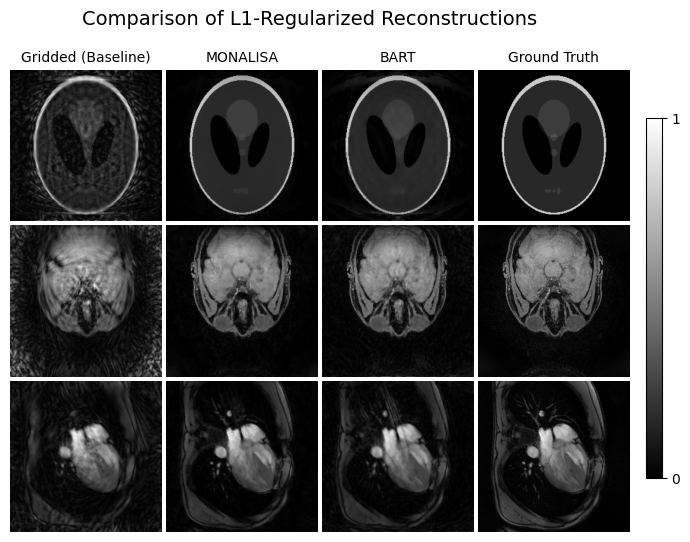

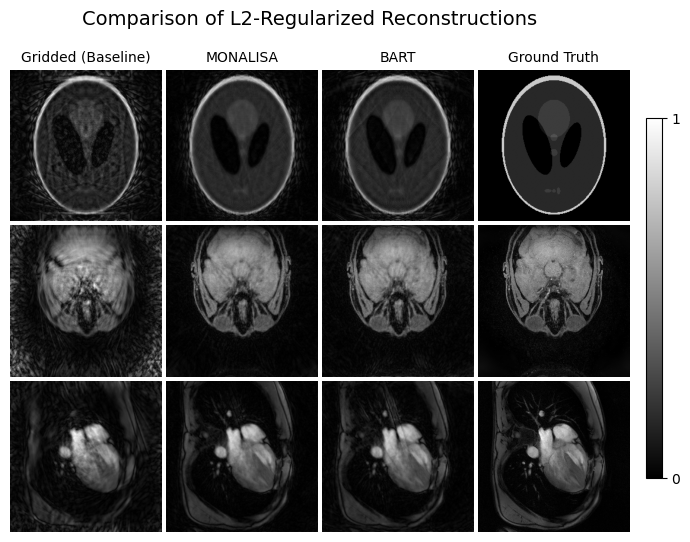


=== SSIM Scores ===
Gridded Reconstructions: [np.float64(0.28679447848774003), np.float64(0.23900024515044885), np.float64(0.45512877098400367)]
L1 Regularization (MONALISA): [np.float64(0.8299396842644526), np.float64(0.6673757111563647), np.float64(0.768202768179415)]
L1 Regularization (BART): [np.float64(0.7633966932947508), np.float64(0.6150005006532717), np.float64(0.6921120593496564)]
L2 Regularization (MONALISA): [np.float64(0.5246726672921072), np.float64(0.6611405966575568), np.float64(0.7692795382773443)]
L2 Regularization (BART): [np.float64(0.4779033602866465), np.float64(0.6104890760036182), np.float64(0.6926754864828768)]

=== L2 Distances ===
Gridded Reconstructions: [np.float32(23.51723), np.float32(85.340805), np.float32(28.107843)]
L1 Regularization (MONALISA): [np.float32(6.413603), np.float32(35.133736), np.float32(13.693838)]
L1 Regularization (BART): [np.float32(10.766788), np.float32(37.782856), np.float32(19.05201)]
L2 Regularization (MONALISA): [np.float32(17.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Filepath settings
prefixes = ['phantom','eye','cardiac']
rootfilepath = './reconstructions/'

# Load Images

groundtruths = [abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}')) for prefix in prefixes]
# Load and normalize gridded recons on the rois
griddedrecons = []
for i, prefix in enumerate(prefixes):
    if prefix == 'phantom':
        ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
    elif prefix == 'eye':
        ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
    elif prefix == 'cardiac':
        ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
    else:
        raise ValueError(f"Invalid prefix provided: {prefix}")
    
    recon = abs(cfl.readcfl(f'./reconstructions/griddedrecons/gridded_recon_{prefix}'))
    gt    = abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}'))  # load ground truth
    recon_norm = normalize_within_roi(recon, gt, ellipse_params)
    griddedrecons.append(recon_norm)
    
# Load L1 images
regtype = 'l1'
monalisa_images_l1 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l1 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]
# Load L2 images
regtype = 'l2'
monalisa_images_l2 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l2 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]

# Compute metrics for each reconstruction type
ssim_gridded, l2_gridded = compute_metrics(griddedrecons, groundtruths)
ssim_l1, l2_l1 = compute_metrics(monalisa_images_l1, groundtruths)
ssim_l2, l2_l2 = compute_metrics(monalisa_images_l2, groundtruths)
ssim_bart_l1, l2_bart_l1 = compute_metrics(bart_images_l1, groundtruths)
ssim_bart_l2, l2_bart_l2 = compute_metrics(bart_images_l2, groundtruths)

# Organize data for plotting
titles = ['Gridded (Baseline)', 'MONALISA', 'BART', 'Ground Truth']
row_titles = ['Phantom', 'Eye', 'Cardiac']

def plot_reconstructions(images, title):
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(3, 4, figure=fig, hspace=0.025, wspace=0.025)

    for i, row in enumerate(images):
        row_min = min(abs(image).min() for image in row)
        row_max = max(abs(image).max() for image in row)

        for j, image in enumerate(row):
            ax = fig.add_subplot(gs[i, j])
            im = ax.imshow(abs(image), cmap='gray', vmin=row_min, vmax=row_max)
            ax.axis('off')

            if i == 0:
                ax.set_title(titles[j], fontsize=10)
            if j == 0:
                ax.set_ylabel(row_titles[i], fontsize=10, rotation=90, labelpad=10)

    # Add a single colorbar from 0 to 1 (black to white)
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position of the colorbar
    norm = plt.Normalize(vmin=0, vmax=1)  # Fixed 0-1 scale
    sm = plt.cm.ScalarMappable(cmap="gray", norm=norm)
    sm.set_array([])  # Dummy array for colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax)

    # Set custom ticks and labels
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["0", "1"])

    plt.suptitle(title, fontsize=14)
    plt.show()

# Plot L1 reconstructions
images_l1 = list(zip(griddedrecons, monalisa_images_l1, bart_images_l1, groundtruths))
plot_reconstructions(images_l1, 'Comparison of L1-Regularized Reconstructions')

# Plot L2 reconstructions
images_l2 = list(zip(griddedrecons, monalisa_images_l2, bart_images_l2, groundtruths))
plot_reconstructions(images_l2, 'Comparison of L2-Regularized Reconstructions')

# Print SSIM and L2 Distances
print("\n=== SSIM Scores ===")
print("Gridded Reconstructions:", ssim_gridded)
print("L1 Regularization (MONALISA):", ssim_l1)
print("L1 Regularization (BART):", ssim_bart_l1)
print("L2 Regularization (MONALISA):", ssim_l2)
print("L2 Regularization (BART):", ssim_bart_l2)

print("\n=== L2 Distances ===")
print("Gridded Reconstructions:", l2_gridded)
print("L1 Regularization (MONALISA):", l2_l1)
print("L1 Regularization (BART):", l2_bart_l1)
print("L2 Regularization (MONALISA):", l2_l2)
print("L2 Regularization (BART):", l2_bart_l2)


# We need to improve the contrast, to visualize better the artifacts

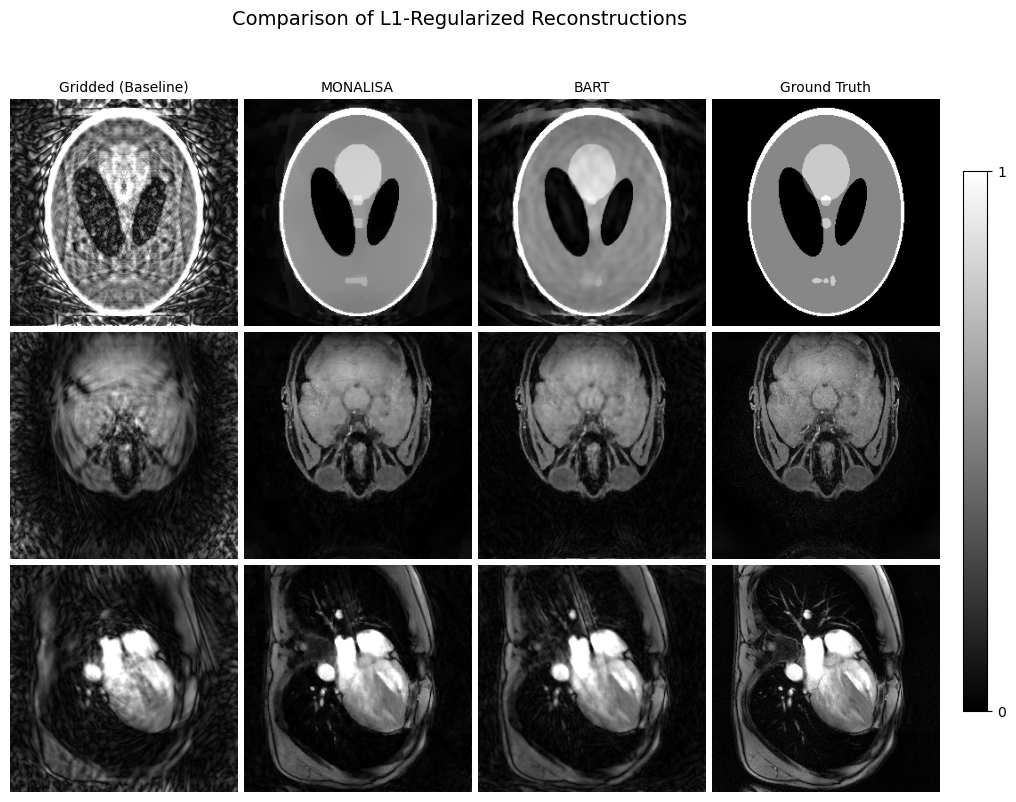

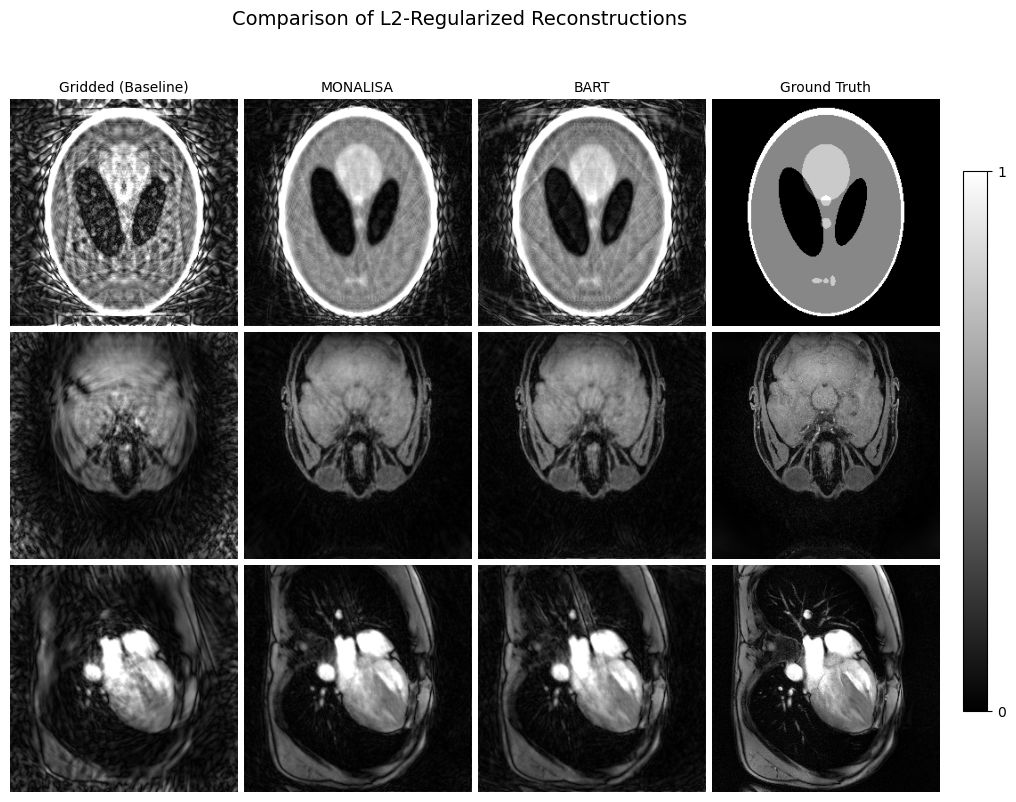


=== SSIM Scores ===
Gridded Reconstructions: [np.float64(0.28679447848774003), np.float64(0.23900024515044885), np.float64(0.45512877098400367)]
L1 Regularization (MONALISA): [np.float64(0.8299396842644526), np.float64(0.6673757111563647), np.float64(0.768202768179415)]
L1 Regularization (BART): [np.float64(0.7633966932947508), np.float64(0.6150005006532717), np.float64(0.6921120593496564)]
L2 Regularization (MONALISA): [np.float64(0.5246726672921072), np.float64(0.6611405966575568), np.float64(0.7692795382773443)]
L2 Regularization (BART): [np.float64(0.4779033602866465), np.float64(0.6104890760036182), np.float64(0.6926754864828768)]

=== L2 Distances ===
Gridded Reconstructions: [np.float32(23.51723), np.float32(85.340805), np.float32(28.107843)]
L1 Regularization (MONALISA): [np.float32(6.413603), np.float32(35.133736), np.float32(13.693838)]
L1 Regularization (BART): [np.float32(10.766788), np.float32(37.782856), np.float32(19.05201)]
L2 Regularization (MONALISA): [np.float32(17.

In [31]:
# HERE WE JUST IMPROVE THE PAGINATION AND CONTRAST FOR PRESENTING THE IMAGES
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


# Filepath settings
prefixes = ['phantom','eye','cardiac']
rootfilepath = './reconstructions/'

# Load Images
groundtruths = [abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}')) for prefix in prefixes]
# Load and normalize gridded recons on the rois
griddedrecons = []
for i, prefix in enumerate(prefixes):
    if prefix == 'phantom':
        ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
    elif prefix == 'eye':
        ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
    elif prefix == 'cardiac':
        ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
    else:
        raise ValueError(f"Invalid prefix provided: {prefix}")
    
    recon = abs(cfl.readcfl(f'./reconstructions/griddedrecons/gridded_recon_{prefix}'))
    gt    = abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}'))  # load ground truth
    recon_norm = normalize_within_roi(recon, gt, ellipse_params)
    griddedrecons.append(recon_norm)
# Load L1 images
regtype = 'l1'
monalisa_images_l1 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l1 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]
# Load L2 images
regtype = 'l2'
monalisa_images_l2 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l2 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}') for prefix in prefixes]

# Compute metrics for each reconstruction type
ssim_gridded, l2_gridded = compute_metrics(griddedrecons, groundtruths)
ssim_l1, l2_l1 = compute_metrics(monalisa_images_l1, groundtruths)
ssim_l2, l2_l2 = compute_metrics(monalisa_images_l2, groundtruths)
ssim_bart_l1, l2_bart_l1 = compute_metrics(bart_images_l1, groundtruths)
ssim_bart_l2, l2_bart_l2 = compute_metrics(bart_images_l2, groundtruths)

# Organize data for plotting
titles = ['Gridded (Baseline)', 'MONALISA', 'BART', 'Ground Truth']
row_titles = ['Phantom', 'Brain', 'Cardiac']
contrastfactors = [0.3,1,0.6]

def plot_reconstructions(images, title):
    fig = plt.figure(figsize=(3*(len(prefixes)+ 1), 3*(len(titles) -1)))
    gs = GridSpec(len(prefixes), 4, figure=fig, hspace=0.025, wspace=0.025)

    for i, row in enumerate(images):
        row_min = min(abs(image).min() for image in row)
        row_max = max(abs(image).max() for image in row)
        vmax = row_max*contrastfactors[i]

        for j, image in enumerate(row):
            ax = fig.add_subplot(gs[i, j])
            im = ax.imshow(abs(image), cmap='gray', vmin=row_min, vmax=vmax)
            ax.axis('off')

            if i == 0:
                ax.set_title(titles[j], fontsize=10)
            if j == 0:
                ax.set_ylabel(row_titles[i], fontsize=10, rotation=90, labelpad=10)

    # Add a single colorbar from 0 to 1 (black to white)
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position of the colorbar
    norm = plt.Normalize(vmin=0, vmax=1)  # Fixed 0-1 scale
    sm = plt.cm.ScalarMappable(cmap="gray", norm=norm)
    sm.set_array([])  # Dummy array for colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax)

    # Set custom ticks and labels
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["0", "1"])

    plt.suptitle(title, fontsize=14)
    plt.show()

# Plot L1 reconstructions
images_l1 = list(zip(griddedrecons, monalisa_images_l1, bart_images_l1, groundtruths))
plot_reconstructions(images_l1, 'Comparison of L1-Regularized Reconstructions')

# Plot L2 reconstructions
images_l2 = list(zip(griddedrecons, monalisa_images_l2, bart_images_l2, groundtruths))
plot_reconstructions(images_l2, 'Comparison of L2-Regularized Reconstructions')

# Print SSIM and L2 Distances
print("\n=== SSIM Scores ===")
print("Gridded Reconstructions:", ssim_gridded)
print("L1 Regularization (MONALISA):", ssim_l1)
print("L1 Regularization (BART):", ssim_bart_l1)
print("L2 Regularization (MONALISA):", ssim_l2)
print("L2 Regularization (BART):", ssim_bart_l2)

print("\n=== L2 Distances ===")
print("Gridded Reconstructions:", l2_gridded)
print("L1 Regularization (MONALISA):", l2_l1)
print("L1 Regularization (BART):", l2_bart_l1)
print("L2 Regularization (MONALISA):", l2_l2)
print("L2 Regularization (BART):", l2_bart_l2)


# COMPARE WITH BART USING 250 ITERATIONS FOR SUPPLEMENTARY MATERIAL

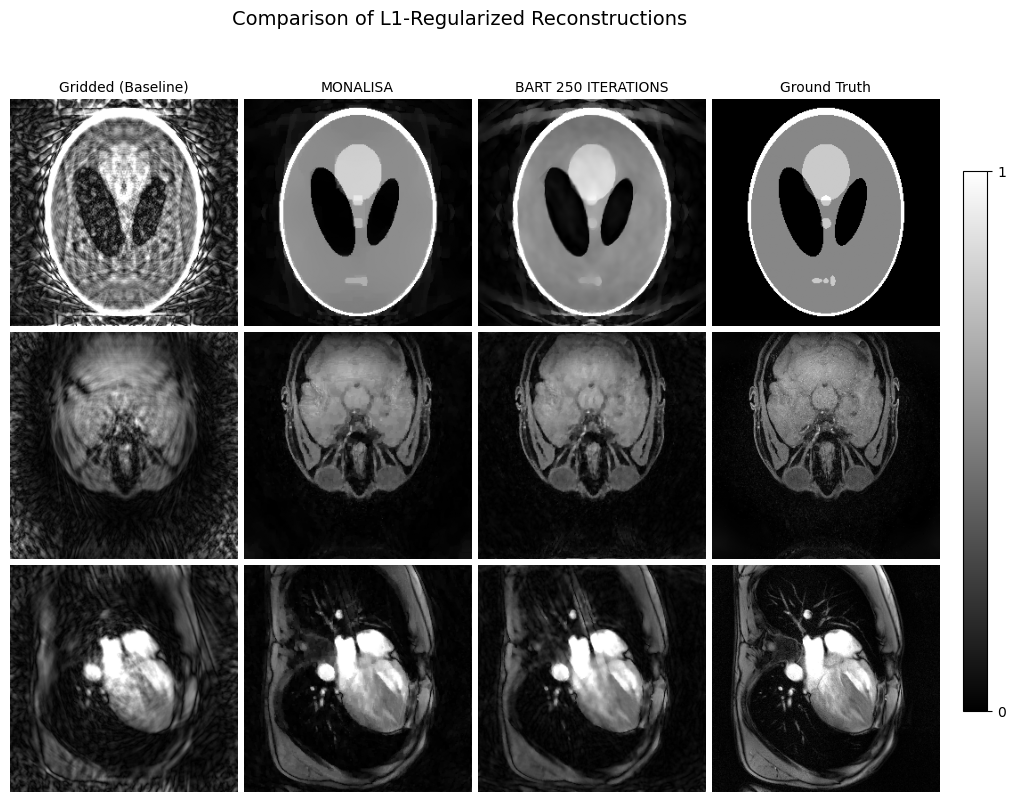

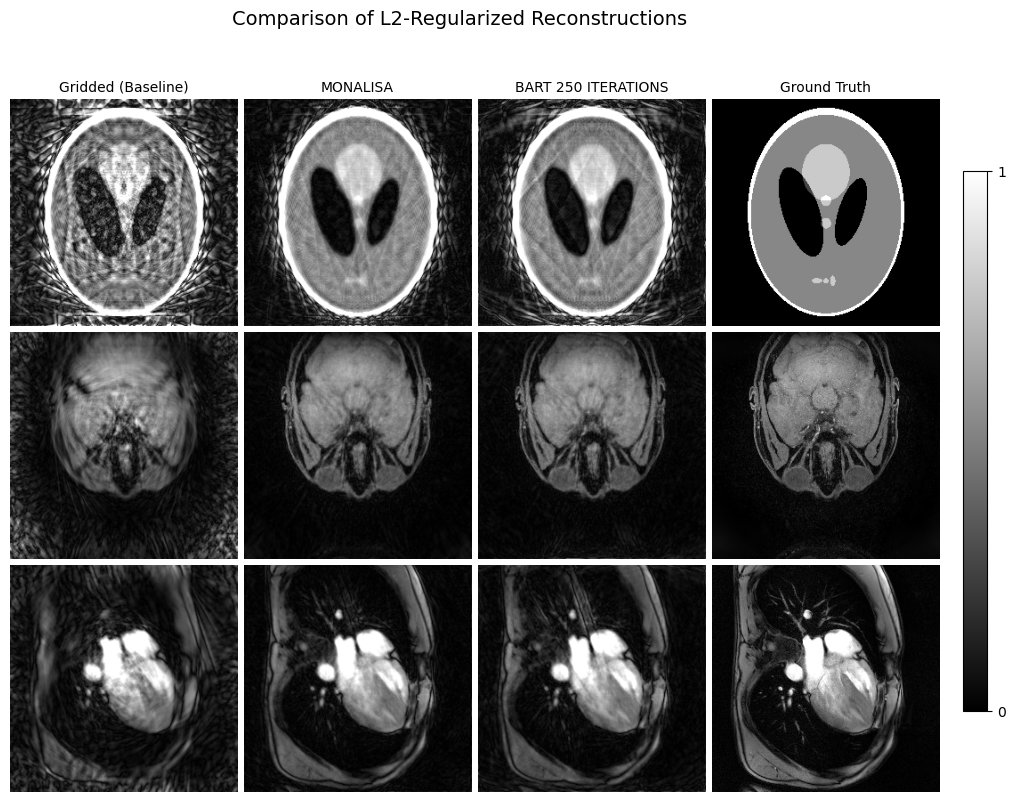


=== SSIM Scores ===
Gridded Reconstructions: [np.float64(0.28679447848774003), np.float64(0.23900024515044885), np.float64(0.45512877098400367)]
L1 Regularization (MONALISA): [np.float64(0.8299396842644526), np.float64(0.6673757111563647), np.float64(0.768202768179415)]
L1 Regularization (BART): [np.float64(0.7689866330416378), np.float64(0.6194141491580796), np.float64(0.6915037162988322)]
L2 Regularization (MONALISA): [np.float64(0.5246726672921072), np.float64(0.6611405966575568), np.float64(0.7692795382773443)]
L2 Regularization (BART): [np.float64(0.477903359929612), np.float64(0.610489140968689), np.float64(0.6926755216250811)]

=== L2 Distances ===
Gridded Reconstructions: [np.float32(23.51723), np.float32(85.340805), np.float32(28.107843)]
L1 Regularization (MONALISA): [np.float32(6.413603), np.float32(35.133736), np.float32(13.693838)]
L1 Regularization (BART): [np.float32(10.546735), np.float32(37.263374), np.float32(18.99119)]
L2 Regularization (MONALISA): [np.float32(17.79

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Filepath settings
prefixes = ['phantom','eye','cardiac']
rootfilepath = './reconstructions/'

# Load Images
groundtruths = [abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}')) for prefix in prefixes]
# Load and normalize gridded recons on the rois
griddedrecons = []
for i, prefix in enumerate(prefixes):
    if prefix == 'phantom':
        ellipse_params = {'center_x': 128, 'center_y': 126, 'major_axis': 89, 'minor_axis': 118, 'angle': 0}
    elif prefix == 'eye':
        ellipse_params = {'center_x': 128, 'center_y': 83, 'major_axis': 85, 'minor_axis': 113, 'angle': 0}
    elif prefix == 'cardiac':
        ellipse_params = {"center_x": 141, "center_y": 130, "major_axis": 64, "minor_axis": 45, "angle": 67}
    else:
        raise ValueError(f"Invalid prefix provided: {prefix}")
    
    recon = abs(cfl.readcfl(f'./reconstructions/griddedrecons/gridded_recon_{prefix}'))
    gt    = abs(cfl.readcfl(f'./bart_data/image_bart_{prefix}'))  # load ground truth
    recon_norm = normalize_within_roi(recon, gt, ellipse_params)
    griddedrecons.append(recon_norm)
# Load L1 images
regtype = 'l1'
monalisa_images_l1 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l1 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}_250_iterations') for prefix in prefixes]
# Load L2 images
regtype = 'l2'
monalisa_images_l2 = [readMatToNpArray(rootfilepath + 'monalisa/' + f'{prefix}_{regtype}.mat') for prefix in prefixes]
bart_images_l2 = [cfl.readcfl(f'./reconstructions/bart/{prefix}_{regtype}_250_iterations') for prefix in prefixes]

# Compute metrics for each reconstruction type
ssim_gridded, l2_gridded = compute_metrics(griddedrecons, groundtruths)
ssim_l1, l2_l1 = compute_metrics(monalisa_images_l1, groundtruths)
ssim_l2, l2_l2 = compute_metrics(monalisa_images_l2, groundtruths)
ssim_bart_l1, l2_bart_l1 = compute_metrics(bart_images_l1, groundtruths)
ssim_bart_l2, l2_bart_l2 = compute_metrics(bart_images_l2, groundtruths)

# Organize data for plotting
titles = ['Gridded (Baseline)', 'MONALISA', 'BART 250 ITERATIONS', 'Ground Truth']
row_titles = ['Phantom', 'Brain', 'Cardiac']
contrastfactors = [0.3,1,0.6]

def plot_reconstructions(images, title):
    fig = plt.figure(figsize=(3*(len(prefixes)+ 1), 3*(len(titles) -1)))
    gs = GridSpec(len(prefixes), 4, figure=fig, hspace=0.025, wspace=0.025)

    for i, row in enumerate(images):
        row_min = min(abs(image).min() for image in row)
        row_max = max(abs(image).max() for image in row)
        vmax = row_max*contrastfactors[i]
        for j, image in enumerate(row):
            ax = fig.add_subplot(gs[i, j])
            im = ax.imshow(abs(image), cmap='gray', vmin=row_min, vmax=vmax)
            ax.axis('off')

            if i == 0:
                ax.set_title(titles[j], fontsize=10)
            if j == 0:
                ax.set_ylabel(row_titles[i], fontsize=10, rotation=90, labelpad=10)

    # Add a single colorbar from 0 to 1 (black to white)
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position of the colorbar
    norm = plt.Normalize(vmin=0, vmax=1)  # Fixed 0-1 scale
    sm = plt.cm.ScalarMappable(cmap="gray", norm=norm)
    sm.set_array([])  # Dummy array for colorbar
    cbar = fig.colorbar(sm, cax=cbar_ax)

    # Set custom ticks and labels
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(["0", "1"])

    plt.suptitle(title, fontsize=14)
    plt.show()

# Plot L1 reconstructions
images_l1 = list(zip(griddedrecons, monalisa_images_l1, bart_images_l1, groundtruths))
plot_reconstructions(images_l1, 'Comparison of L1-Regularized Reconstructions')

# Plot L2 reconstructions
images_l2 = list(zip(griddedrecons, monalisa_images_l2, bart_images_l2, groundtruths))
plot_reconstructions(images_l2, 'Comparison of L2-Regularized Reconstructions')

# Print SSIM and L2 Distances
print("\n=== SSIM Scores ===")
print("Gridded Reconstructions:", ssim_gridded)
print("L1 Regularization (MONALISA):", ssim_l1)
print("L1 Regularization (BART):", ssim_bart_l1)
print("L2 Regularization (MONALISA):", ssim_l2)
print("L2 Regularization (BART):", ssim_bart_l2)

print("\n=== L2 Distances ===")
print("Gridded Reconstructions:", l2_gridded)
print("L1 Regularization (MONALISA):", l2_l1)
print("L1 Regularization (BART):", l2_bart_l1)
print("L2 Regularization (MONALISA):", l2_l2)
print("L2 Regularization (BART):", l2_bart_l2)
